In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

In [2]:
dfm = pd.read_csv('dfm.csv')

In [3]:
y = dfm['FLIGHT_STATUS']
X = dfm.drop(['FLIGHT_STATUS'], axis=1)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
# Build a regular tree as baseline
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, class_weight="balanced")
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [8]:
# Test set predictions
pred = tree_clf.predict(X_test)

In [9]:
# confusion matrix and classfication report
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,574881,48570,623451
1,103177,226631,329808
All,678058,275201,953259


In [10]:
from sklearn.metrics import classification_report

In [11]:
print('Classificiation Report')
print('---------------------')
print(classification_report(y_test, pred))

Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.85      0.92      0.88    623451
           1       0.82      0.69      0.75    329808

    accuracy                           0.84    953259
   macro avg       0.84      0.80      0.82    953259
weighted avg       0.84      0.84      0.84    953259



In [12]:
from sklearn.metrics import accuracy_score

In [13]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 84.08%


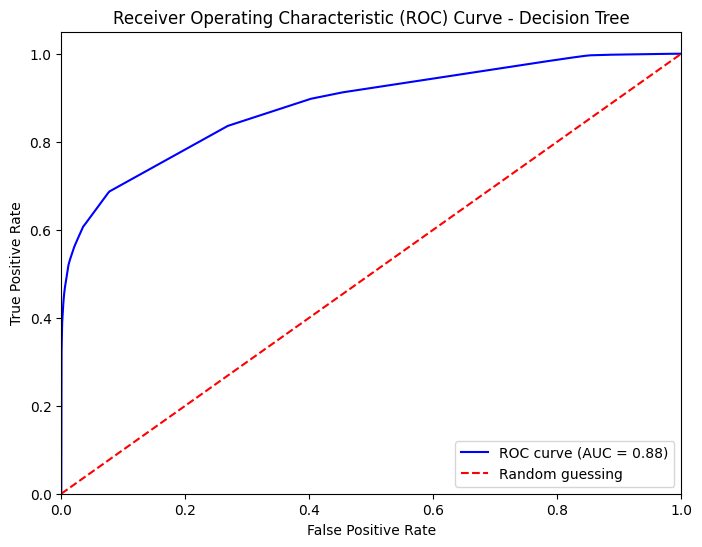

In [14]:
from sklearn.metrics import roc_curve, auc

# Assuming you have the true labels (y_test) and predicted probabilities (y_prob) for the positive class

# Predict probabilities for the test set
y_prob = tree_clf.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

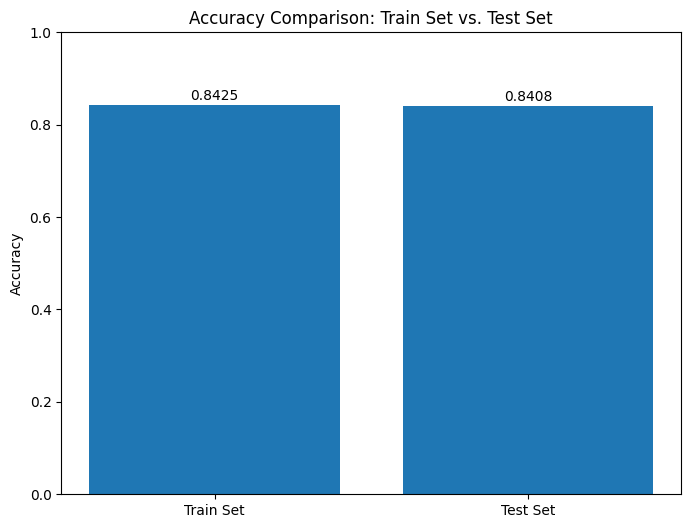

In [15]:
# Predict on the training set
train_pred = tree_clf.predict(X_train)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, pred)

# Create a bar graph
labels = ['Train Set', 'Test Set']
accuracy_scores = [train_accuracy, test_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Train Set vs. Test Set')
plt.ylim([0, 1])

for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

plt.show()

In [17]:
from sklearn.metrics import confusion_matrix

XGBoost Performance:
Test Set Accuracy Score: 0.9884186895495458
Validation Set Accuracy Score: 0.9882340599626545


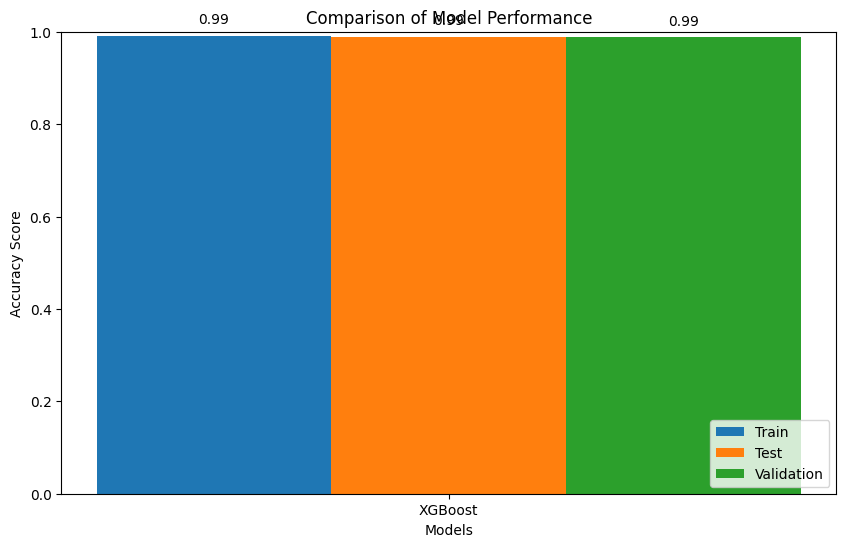

XGBoost Performance:
Test Set Accuracy Score: 0.9884186895495458
Validation Set Accuracy Score: 0.9882340599626545
Training Set Accuracy: 0.9908622213767792
XGBoost Performance:
Test Set Accuracy Score: 0.9884186895495458
Validation Set Accuracy Score: 0.9882340599626545
Confusion Matrix (Test Set):
 [[154917   1032]
 [  1728  80638]]
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    155949
           1       0.99      0.98      0.98     82366

    accuracy                           0.99    238315
   macro avg       0.99      0.99      0.99    238315
weighted avg       0.99      0.99      0.99    238315



In [18]:
from xgboost import XGBClassifier

# Create features (X) and labels (y)
y = dfm['FLIGHT_STATUS']
X = dfm.drop(['FLIGHT_STATUS'], axis=1)

# Split the data into training, testing, and validation sets (60/20/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Create and train the models
xgb_clf = XGBClassifier(n_estimators=100, random_state=42, enable_categorical = True)

xgb_clf.fit(X_train, y_train)

# Make predictions on the test and validation sets
xgb_pred_test = xgb_clf.predict(X_test)
xgb_pred_val = xgb_clf.predict(X_val)

# Evaluate the models
print("XGBoost Performance:")
print("Test Set Accuracy Score:", accuracy_score(y_test, xgb_pred_test))
print("Validation Set Accuracy Score:", accuracy_score(y_val, xgb_pred_val))

# Plot the comparison graph
plt.figure(figsize=(10, 6))
models = ['XGBoost']
train_scores = [accuracy_score(y_train, xgb_clf.predict(X_train))]
test_scores = [accuracy_score(y_test, xgb_pred_test)]
val_scores = [accuracy_score(y_val, xgb_pred_val)]

x = range(len(models))
width = 0.25

plt.bar([i - width for i in x], train_scores, width, label='Train')
plt.bar(x, test_scores, width, label='Test')
plt.bar([i + width for i in x], val_scores, width, label='Validation')

plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Performance')
plt.xticks(x, models)
plt.legend(loc='lower right')

# Adding text labels for accuracy scores
for i in range(len(models)):
    plt.text(i - width, train_scores[i] + 0.02, f'{train_scores[i]:.2f}', ha='center', va='bottom')
    plt.text(i, test_scores[i] + 0.02, f'{test_scores[i]:.2f}', ha='center', va='bottom')
    plt.text(i + width, val_scores[i] + 0.02, f'{val_scores[i]:.2f}', ha='center', va='bottom')

plt.ylim([0, 1])
plt.show()

print("XGBoost Performance:")
print("Test Set Accuracy Score:", accuracy_score(y_test, xgb_pred_test))
print("Validation Set Accuracy Score:", accuracy_score(y_val, xgb_pred_val))
train_pred = xgb_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print("Training Set Accuracy:", train_accuracy)

print("XGBoost Performance:")
print("Test Set Accuracy Score:", accuracy_score(y_test, xgb_pred_test))
print("Validation Set Accuracy Score:", accuracy_score(y_val, xgb_pred_val))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, xgb_pred_test))
print("Classification Report (Test Set):\n", classification_report(y_test, xgb_pred_test))

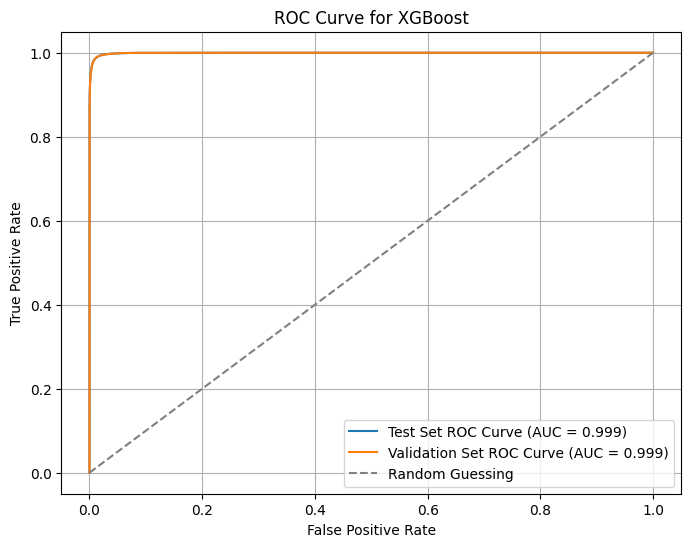

XGBoost Performance:
Test Set Accuracy Score: 0.9884186895495458
Test Set ROC AUC Score: 0.9993895292023717
Validation Set Accuracy Score: 0.9882340599626545
Validation Set ROC AUC Score: 0.9993588844521563


In [19]:
# Compute the ROC curve and AUC for the test set
xgb_prob_test = xgb_clf.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, xgb_prob_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Compute the ROC curve and AUC for the validation set
xgb_prob_val = xgb_clf.predict_proba(X_val)[:, 1]
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, xgb_prob_val)
roc_auc_val = auc(fpr_val, tpr_val)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test Set ROC Curve (AUC = {roc_auc_test:.3f})')
plt.plot(fpr_val, tpr_val, label=f'Validation Set ROC Curve (AUC = {roc_auc_val:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend()
plt.grid(True)
plt.show()

# Print the accuracy scores and ROC AUC scores
print("XGBoost Performance:")
print("Test Set Accuracy Score:", accuracy_score(y_test, xgb_pred_test))
print("Test Set ROC AUC Score:", roc_auc_test)
print("Validation Set Accuracy Score:", accuracy_score(y_val, xgb_pred_val))
print("Validation Set ROC AUC Score:", roc_auc_val)